# Rev 스타일/기능 변경
- 색각이상 친화 팔레트 적용 (seaborn 'colorblind', matplotlib 'tab10'/'cividis').
- 범례 대비/가독성 강화 (배경/테두리/폰트).
- 저장 경로는 기존과 동일(`LaTeX/Figures/...`) 권장.



In [ ]:
# 전역 스타일 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set_palette('colorblind')
except Exception:
    pass
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=plt.get_cmap('tab10').colors)
mpl.rcParams['image.cmap'] = 'cividis'
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 13
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.facecolor'] = 'white'
mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.framealpha'] = 0.9
mpl.rcParams['legend.fontsize'] = 10



In [9]:
import os
import time
import string

import numpy as np
import pandas as pd

from datetime import datetime, timedelta
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

from tqdm import tqdm

# Font
from matplotlib import font_manager
font_path = "/workspace/fonts/"
font_list = os.listdir(font_path)
for font_file in font_list:
    try:
        font_manager.fontManager.addfont(font_path + font_file)
    except:
        raise Exception(f"Cannot Load {font_path+font_file}")

In [20]:
path = 'Data/'
flist = sorted([x for x in os.listdir('./Data/')if x.endswith('txt')])

df_ress = []
for f in tqdm(flist):
    df_res = pd.read_parquet(f'Data_mid/{f[8:-4]}_CEEMDAN_2048_0.6.parquet')
    df_ress.append(df_res)

100%|██████████| 21/21 [00:00<00:00, 634.21it/s]


In [21]:
limfs = []
stations = []
for i, df_res in enumerate(df_ress):
    limfs.append(df_res.iloc[:,-1] - df_res.iloc[0,-1])
    stations.append(flist[i][8:-4])

In [22]:
df = pd.concat(limfs, axis=1)
df.columns = stations
df

,Anheung,Boryeong,Busan,Chujado,Gadeokdo,Geomundo,Gunsan,Heuksando,Incheon,Jeju,...,Mukho,Pohang,Seogwipo,Sokcho,Tongyeong,Ulleungdo,Ulsan,Wando,Wido,Yeosu
1960-01-16 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-02-15 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-03-16 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-05-16 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-16 12:00:00,5.556395,8.323714,10.070342,6.685890,7.867211,5.614686,7.365247,8.473291,12.754467,12.119524,...,9.880661,10.165548,7.446183,11.065120,6.470959,14.107512,8.620393,6.685951,7.080353,7.503207
2020-09-16 00:00:00,5.555815,8.330557,10.068228,6.676169,7.865183,5.614086,7.361516,8.476178,12.753063,12.117908,...,9.875086,10.170573,7.448606,11.061510,6.466714,14.076808,8.616159,6.684769,7.082120,7.500980
2020-10-16 12:00:00,5.555155,8.336992,10.065709,6.666062,7.862219,5.613338,7.357609,8.478950,12.751311,12.115951,...,9.869216,10.175094,7.450868,11.057389,6.462258,14.044301,8.611513,6.683432,7.083721,7.498653
2020-11-16 00:00:00,5.554413,8.343012,10.062788,6.655571,7.858328,5.612441,7.353526,8.481606,12.749212,12.113656,...,9.863055,10.179111,7.452968,11.052757,6.457594,14.010009,8.606458,6.681939,7.085156,7.496226


In [23]:
sorted_name = ['Incheon', 'Anheung', 'Boryeong', 'Gunsan', 'Wido', 'Mokpo', 'Heuksando', 'Chujado', 'Jeju', 'Seogwipo', 
               'Wando', 'Geomundo', 'Yeosu', 'Tongyeong', 'Gadeokdo', 'Busan', 'Ulsan', 'Pohang', 'Mukho', 'Sokcho', 'Ulleungdo']
dict_name_to_index = {}
for i, n in enumerate(sorted_name):
    dict_name_to_index[n] = i

In [24]:
path = 'Data/'
flist = sorted([x for x in os.listdir('./Data/')if x.endswith('txt')])

df_oris = []
for f in tqdm(flist):
    df_ori = pd.read_csv(path+f, sep='\t', header=None)
    df_oris.append(df_ori)

df_tot = pd.DataFrame([], index=pd.date_range('1960-01-01', '2020-12-01', freq='MS', ))
# for idx in df_tot.index:
#     idx.day = 1
names = []
for i, df_ori in enumerate(df_oris):
    name = flist[i][8:-4]
    names.append(name)
    
    # 첫 번째 열을 datetime 형식으로 변환
    df_ori[0] = pd.to_datetime(df_ori[0].values, format='%Y %m %d %H %M')
    # 시간을 제거하고 일자를 1일로 설정
    t = df_ori[0].dt.to_period('M').dt.to_timestamp() + pd.offsets.MonthBegin(0)
    d = df_ori[1].values
    x = pd.Series(d, t)
    df_tot[name] = x
df_tot = df_tot.dropna(how='all')

100%|██████████| 21/21 [00:00<00:00, 1326.83it/s]


In [25]:
df.index = df_tot.index

/tmp/ipykernel_113040/2431782379.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


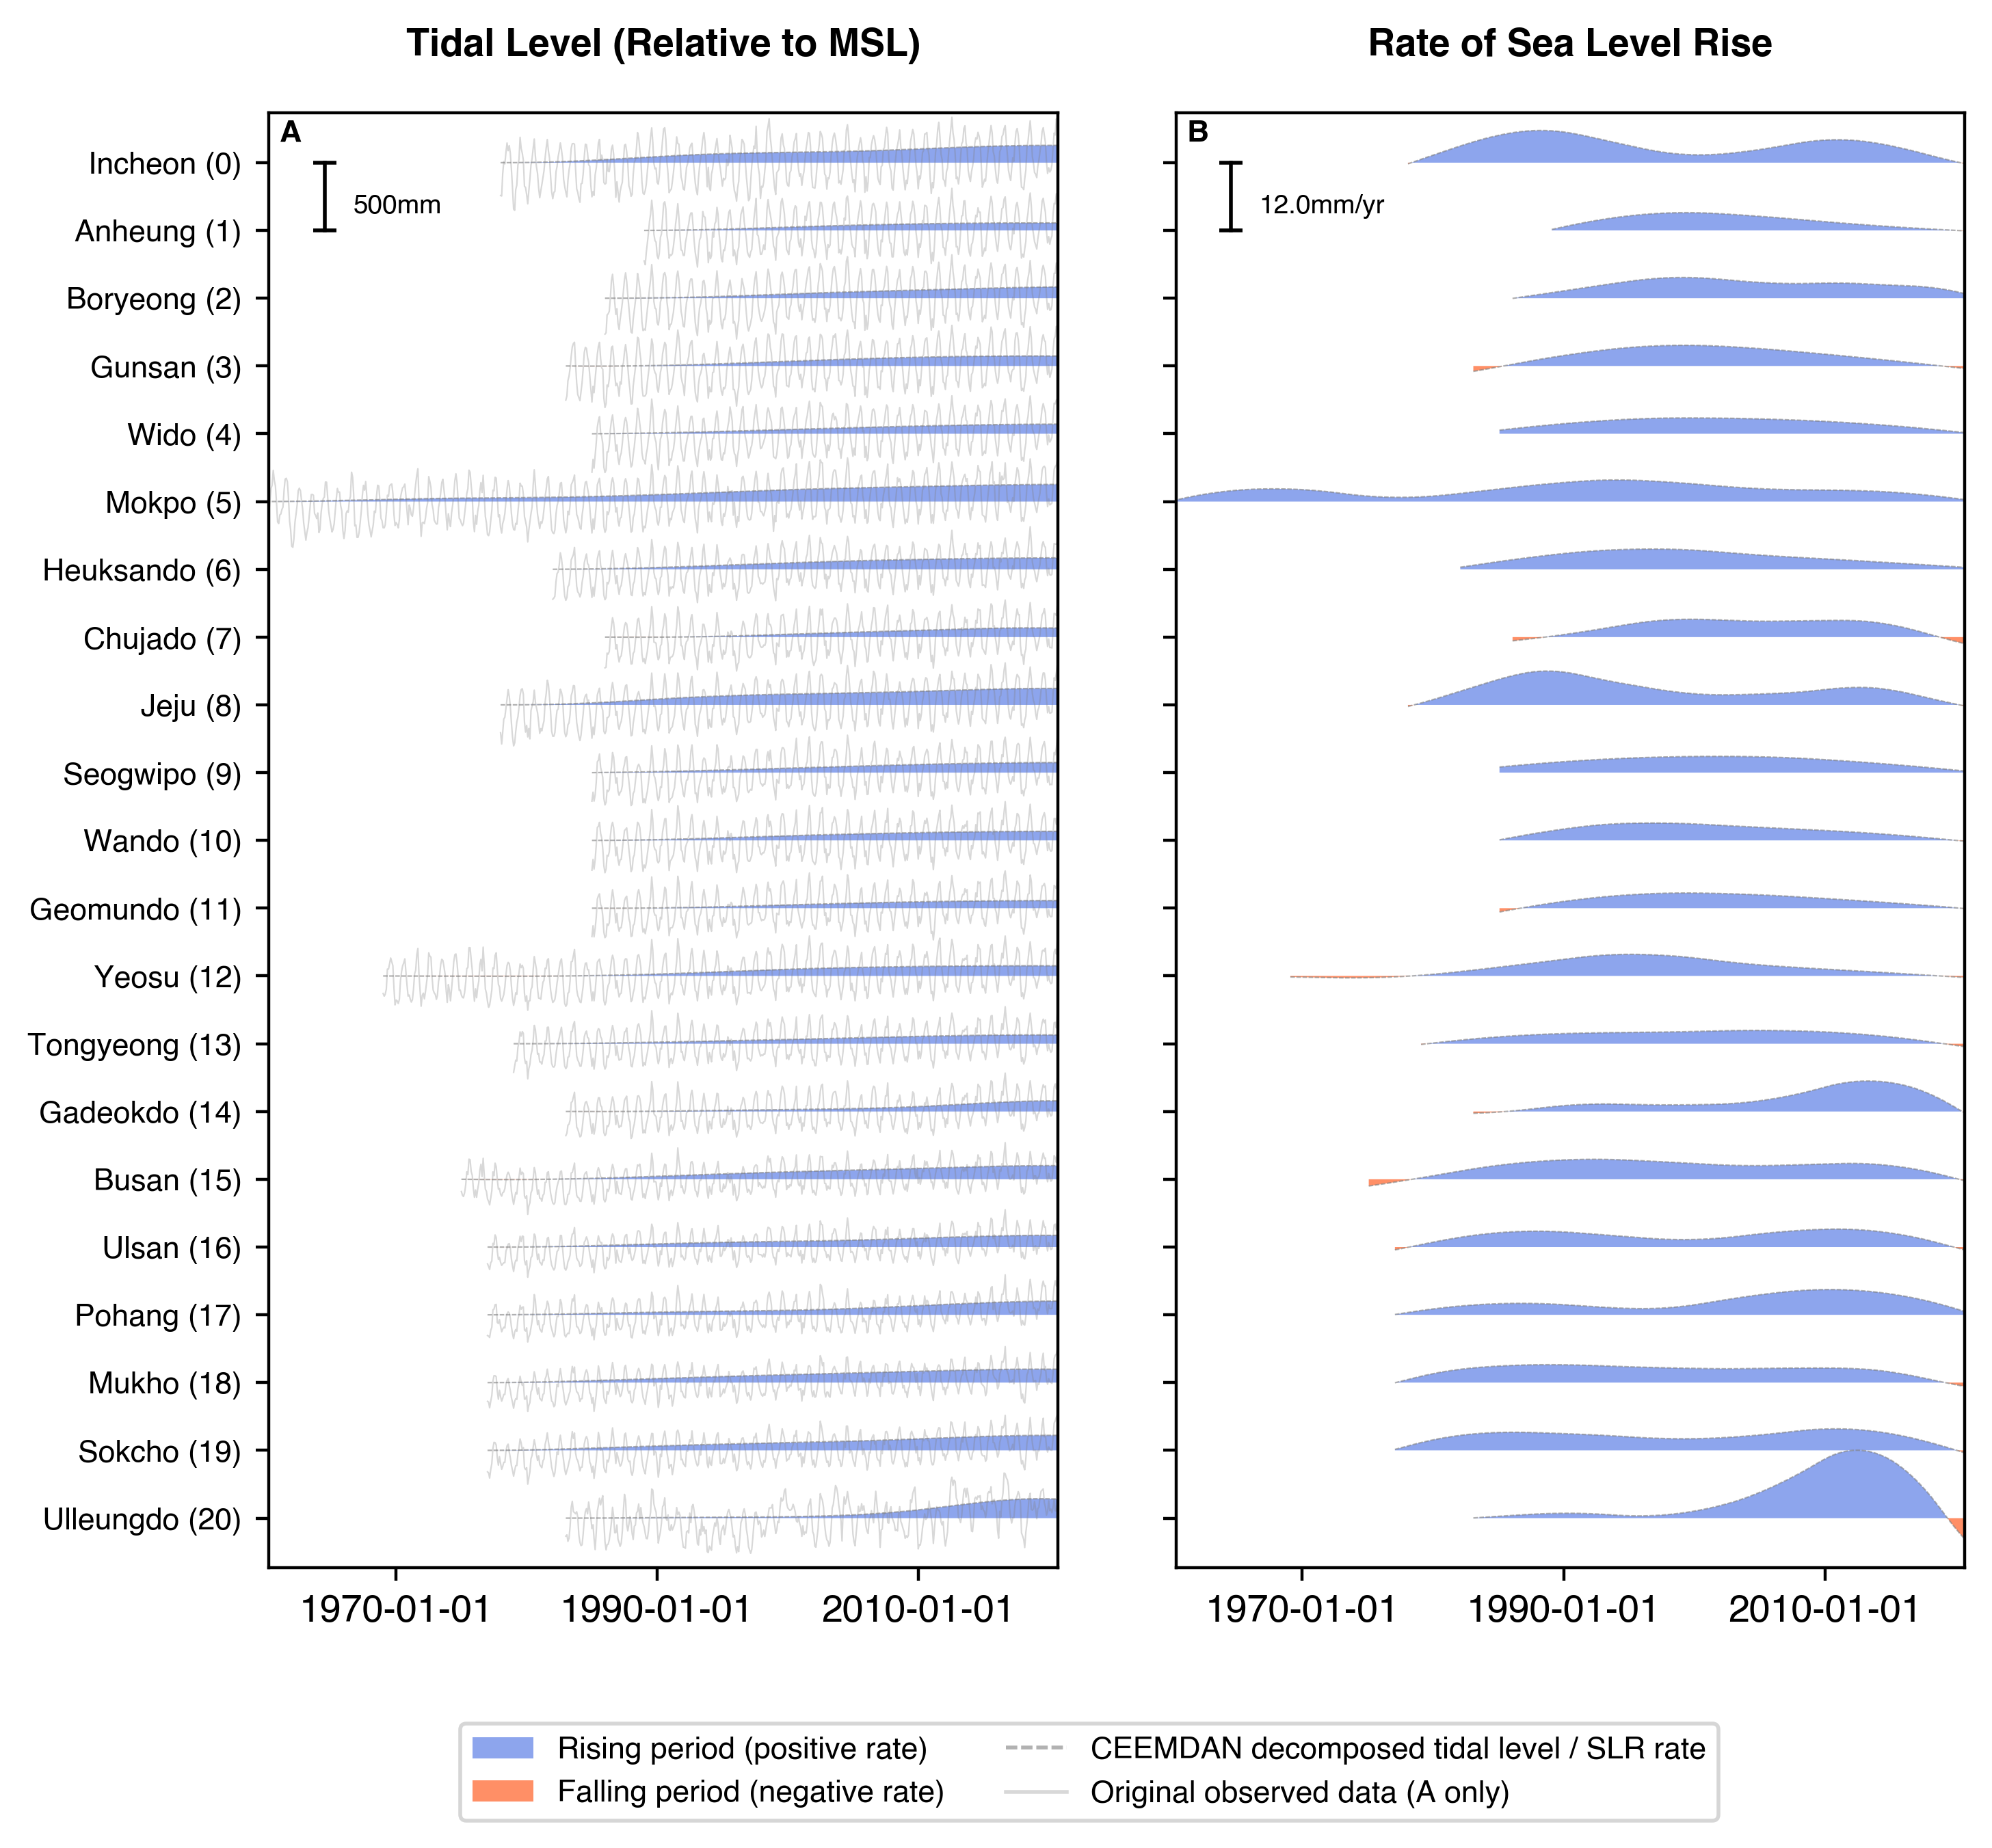

In [26]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import string
from matplotlib.patches import Patch

# Colors
c0 = 'grey'
c1 = 'royalblue'
c2 = 'limegreen'
c3 = 'orangered'

# Initial Y_DIM for first subplot
Y_DIM = 50

# Plotting parameters
X_SIZE = 4
Y_SIZE = 7
N_ROW = 1
N_COL = 2
DPI = 400

plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']
fig = plt.figure(figsize=(X_SIZE*N_COL, Y_SIZE*N_ROW), dpi=DPI)
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig, wspace=.15)

# Prepare station order
idxs = df.count().reset_index().sort_values(0, ascending=False).index.values
stations_ordered = df.count().reset_index().sort_values(0, ascending=False)['index'].values

# ============ Subplot A: Tidal Level ============
axi = 0
ax1 = fig.add_subplot(spec[axi//N_COL, axi%N_COL])
ax1.text(.014, .98, '%s'%(string.ascii_uppercase[axi]), transform=ax1.transAxes, size=8, weight='bold')
ax1.set_title('Tidal Level (Relative to MSL)', fontsize=10, pad=15, weight='bold')

for i, name in enumerate(sorted_name[::-1]):
    x = df[name].iloc[:].dropna() + i*Y_DIM
    x2 = df_tot[name].iloc[:].dropna() - df_tot[name].dropna().mean() + i*Y_DIM
    msk = (x.values - i*Y_DIM) > 0
    
    # Plot lines
    ax1.plot(x.index, x.values, color=c0, alpha=.6, dashes=(3.,1.), lw=.4)
    ax1.plot(x2.index, x2.values, color=c0, alpha=.3, lw=.4)
    
    # Fill areas
    ax1.fill_between(x.index, i*Y_DIM, x.values, msk, color=c1, alpha=.6, ec='none')
    ax1.fill_between(x.index, i*Y_DIM, x.values, ~msk, color=c3, alpha=.6, ec='none')

# Scale Marker
ax1.plot([-2000,-2000], [(i-1)*Y_DIM, i*Y_DIM], marker='_', color='black', lw=1.0)
ax1.text(-1200, (i-.75)*Y_DIM, f'{Y_DIM*10}mm', fontsize=7)

# Y-axis settings - 구문 오류 수정
ax1.set_yticks(np.arange(len(idxs))*Y_DIM)
ax1.set_yticklabels([f"{x} ({i})" for i, x in enumerate(sorted_name)][::-1], fontsize=8)
ax1.set_ylim([-11/15.*Y_DIM, len(idxs)*Y_DIM-Y_DIM/15.*4])

# X-axis settings
xlim = ax1.get_xlim()
xt = ax1.get_xticks()
xl = ax1.get_xticklabels()
ax1.set_xticks(xt[::2])
ax1.set_xlim([xlim[0]+1200, xlim[1]-1200])

# ============ Subplot B: Rate of SLR ============
Y_DIM = .1  # Reset Y_DIM for second subplot
axi = 1
ax2 = fig.add_subplot(spec[axi//N_COL, axi%N_COL])
ax2.text(.014, .98, '%s'%(string.ascii_uppercase[axi]), transform=ax2.transAxes, size=8, weight='bold')
ax2.set_title('Rate of Sea Level Rise', fontsize=10, pad=15, weight='bold')

for i, name in enumerate(sorted_name[::-1]):
    x = df[name].iloc[:].dropna().diff() + i*Y_DIM
    msk = (x.values - i*Y_DIM) > 0
    
    ax2.plot(x.index, x.values, color=c0, alpha=.6, dashes=(3.,1.), lw=.4)
    ax2.fill_between(x.index, i*Y_DIM, x.values, msk, color=c1, alpha=.6, ec='none')
    ax2.fill_between(x.index, i*Y_DIM, x.values, ~msk, color=c3, alpha=.6, ec='none')

# Scale Marker
ax2.plot([-2000,-2000], [(i-1)*Y_DIM, i*Y_DIM], marker='_', color='black', lw=1.0)
ax2.text(-1200, (i-.75)*Y_DIM, f'{Y_DIM*10*12}mm/yr', fontsize=7)

# Y-axis settings
ax2.set_yticks(np.arange(len(idxs))*Y_DIM)
ax2.set_yticklabels(['']*len(idxs))
ax2.set_ylim([-11/15.*Y_DIM, len(idxs)*Y_DIM-Y_DIM/15.*4])

# X-axis settings
xlim = ax2.get_xlim()
xt = ax2.get_xticks()
ax2.set_xticks(xt[::2])
ax2.set_xlim([xlim[0]+1200, xlim[1]-1200])

# ============ Add Legend ============
# Create legend elements
legend_elements = [
    Patch(facecolor=c1, alpha=0.6, label='Rising period (positive rate)'),
    Patch(facecolor=c3, alpha=0.6, label='Falling period (negative rate)'),
    plt.Line2D([0], [0], color=c0, alpha=0.6, linestyle=(0, (3, 1)), 
               linewidth=1, label='CEEMDAN decomposed tidal level / SLR rate'),
    plt.Line2D([0], [0], color=c0, alpha=0.3, linewidth=1, 
               label='Original observed data (A only)')
]

# Add legend to the figure
fig.legend(handles=legend_elements, loc='lower center', ncol=2, 
          bbox_to_anchor=(0.5, -0.02), fontsize=8, frameon=True)

# Adjust layout to accommodate legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.12)

# Save figure
plt.savefig('LaTeX/Figures/Figure5_SLR_Stations.pdf', bbox_inches='tight', format='pdf', dpi=DPI)
plt.show()
